In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_file='friendship.csv'

try:
    df_edges = pd.read_csv(data_file, header=None, names=['Source', 'Target'])
    G = nx.from_pandas_edgelist(df_edges, source='Source', target='Target', create_using=nx.Graph())
    print(f"--- Network Loaded from '{data_file}' ---")

except FileNotFoundError:
    print(f"Error: The file '{data_file}' was not found.")
    print("Please make sure the CSV file is in the correct directory or provide the full path.")
    print("\nFalling back to predefined sample network for demonstration...")

--- Network Loaded from 'friendship.csv' ---


In [3]:

# Option B: (Uncomment to use) Generate a random graph for more nodes
# num_users = 20
# G_random = nx.erdos_renyi_graph(num_users, 0.2) # Erdos-Renyi random graph
# G = G_random # Use this for analysis if you prefer random

In [4]:
# Info Printing
print("--- Network Generation Complete ---")
print(f"Nodes in the network: {G.nodes()}")
print(f"Edges in the network: {G.edges()}")
print("\n" + "="*50 + "\n")

--- Network Generation Complete ---
Nodes in the network: ['Ayush', 'Namisha', 'Yash', 'Uday', 'Abhishek', 'Tejaswini', 'Gaurav', 'Surya', 'Shabnam', 'Purva']
Edges in the network: [('Ayush', 'Namisha'), ('Ayush', 'Yash'), ('Ayush', 'Uday'), ('Ayush', 'Tejaswini'), ('Ayush', 'Purva'), ('Ayush', 'Shabnam'), ('Namisha', 'Uday'), ('Namisha', 'Gaurav'), ('Yash', 'Abhishek'), ('Yash', 'Surya'), ('Uday', 'Tejaswini'), ('Uday', 'Shabnam'), ('Abhishek', 'Gaurav'), ('Tejaswini', 'Surya'), ('Gaurav', 'Shabnam'), ('Surya', 'Purva')]




In [5]:
#Compute Basic Network Properties 

# Number of edges
num_edges = G.number_of_edges()
print(f"Number of edges: {num_edges}")

# Number of nodes
num_nodes = G.number_of_nodes()
print(f"Number of nodes: {num_nodes}")

# Degree of each node
print("\nDegree of each node:")
degrees = dict(G.degree())
for node, degree in degrees.items():
    print(f"  Node '{node}': Degree = {degree}")

Number of edges: 16
Number of nodes: 10

Degree of each node:
  Node 'Ayush': Degree = 6
  Node 'Namisha': Degree = 3
  Node 'Yash': Degree = 3
  Node 'Uday': Degree = 4
  Node 'Abhishek': Degree = 2
  Node 'Tejaswini': Degree = 3
  Node 'Gaurav': Degree = 3
  Node 'Surya': Degree = 3
  Node 'Shabnam': Degree = 3
  Node 'Purva': Degree = 2


In [6]:
# Node with the lowest degree
if degrees:
    lowest_degree_node = min(degrees, key=degrees.get)
    lowest_degree = degrees[lowest_degree_node]
    print(f"\nNode with the lowest degree: '{lowest_degree_node}' (Degree: {lowest_degree})")
else:
    print("\nGraph is empty, cannot determine node with lowest degree.")

# The adjacency list
print("\nThe adjacency list:")
for node in G.nodes():
    neighbors = list(G.neighbors(node))
    print(f"  {node}: {neighbors}")

# Matrix of the graph (Adjacency Matrix)
print("\nAdjacency Matrix:")
adj_matrix = nx.to_numpy_array(G)

# Convert to a more readable format for printing if nodes are strings
nodes_list = list(G.nodes())
print("  " + " ".join([f"{node:<7}" for node in nodes_list]))
for i, row in enumerate(adj_matrix):
    print(f"{nodes_list[i]:<2} " + " ".join([f"{int(val):<7}" for val in row]))

print("\n" + "="*50 + "\n")


Node with the lowest degree: 'Abhishek' (Degree: 2)

The adjacency list:
  Ayush: ['Namisha', 'Yash', 'Uday', 'Tejaswini', 'Purva', 'Shabnam']
  Namisha: ['Ayush', 'Uday', 'Gaurav']
  Yash: ['Ayush', 'Abhishek', 'Surya']
  Uday: ['Namisha', 'Tejaswini', 'Ayush', 'Shabnam']
  Abhishek: ['Yash', 'Gaurav']
  Tejaswini: ['Uday', 'Surya', 'Ayush']
  Gaurav: ['Abhishek', 'Shabnam', 'Namisha']
  Surya: ['Tejaswini', 'Purva', 'Yash']
  Shabnam: ['Gaurav', 'Uday', 'Ayush']
  Purva: ['Surya', 'Ayush']

Adjacency Matrix:
  Ayush   Namisha Yash    Uday    Abhishek Tejaswini Gaurav  Surya   Shabnam Purva  
Ayush 0       1       1       1       0       1       0       0       1       1      
Namisha 1       0       0       1       0       0       1       0       0       0      
Yash 1       0       0       0       1       0       0       1       0       0      
Uday 1       1       0       0       0       1       0       0       1       0      
Abhishek 0       0       1       0       0       0    

Generating network visualization (opens a plot window)...


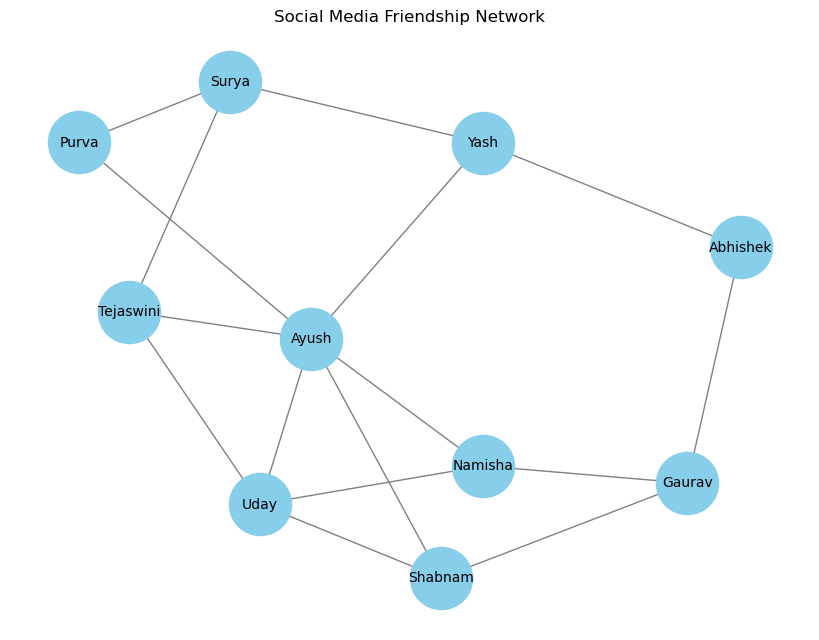

Network visualization displayed.


In [7]:

#  Visualize the Network ---
print("Generating network visualization (opens a plot window)...")
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='gray', linewidths=1, font_size=10)
plt.title("Social Media Friendship Network")
plt.show()
print("Network visualization displayed.")

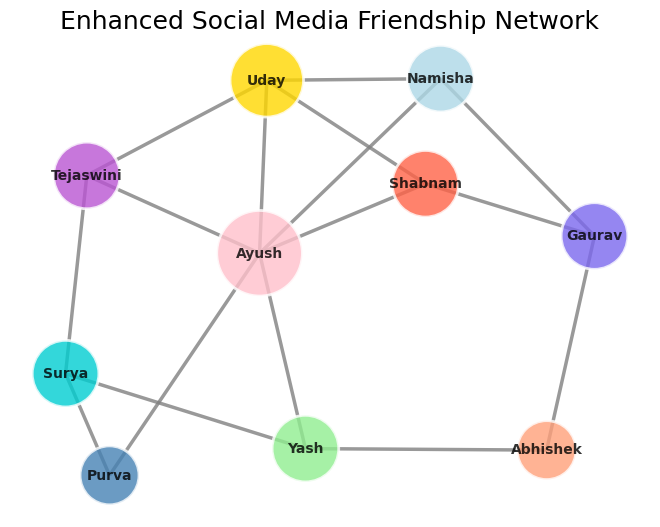

Network visualization displayed.


In [12]:
node_colors_palette = [
    '#FFC0CB', '#ADD8E6', '#90EE90', '#FFD700',
    '#FFA07A', '#BA55D3', '#7B68EE', '#00CED1',
    '#FF6347', '#4682B4', '#DA70D6', '#BDB76B'
]

node_color_list = [node_colors_palette[i % len(node_colors_palette)] for i, node in enumerate(G.nodes())]

node_sizes = [G.degree(node) * 500 + 800 for node in G.nodes()]

pos = nx.spring_layout(G, k=0.3, iterations=50, seed=42)

nx.draw(G, pos,
        with_labels=True,
        node_color=node_color_list,
        node_size=node_sizes,
        alpha=0.8,
        edgecolors='white',
        linewidths=2.0,
        edge_color='gray',
        width=2.5,
        style='solid',
        font_size=10,
        font_color='black',
        font_weight='bold'
       )

plt.title("Enhanced Social Media Friendship Network", fontsize=18)
plt.show()
print("Network visualization displayed.")